In [ ]:
# # View settings
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Import from Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from matplotlib import cm
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**IMPORTING DATA**

In [ ]:
from google.colab import drive  # importing drive module to mount Google Drive
drive.mount('/content/drive/')  # mounting Google Drive to Colab

Mounted at /content/drive/


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/CCDataset.csv',index_col=0)  
# reading the CSV file and storing it as a dataframe in the variable "df"

**BASIC DATA EVALUATION**

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Columns
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
# Dataset Size
df.shape

(8950, 17)

In [ ]:
# General information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

All the columns are either float or integer. So we can say that all are numerical attributes.

In [ ]:
# Unique values in each column
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [ ]:
# Dataset Statistical Description
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Checking for duplicate values**

In [ ]:
# return the number of duplicated rows in df
df.duplicated().sum()

0

So there are no duplicate value

**Checking for NULL values**

In [ ]:
# Null values in the Dataset
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

So we have to treat the missing values of MINIMUM VALUES AND CREDIT LIMIT. CREDIT LIMIT has only one missing value we can delete that tuple which contains the missing value.

In [ ]:
# Deleting the null value in the CREDIT_LIMIT column
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [ ]:
# Null values in the Dataset
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Replacement of null values by the median
median_MINIMUM_PAYMENTS = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(median_MINIMUM_PAYMENTS)

In [ ]:
# Null values in the Dataset
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.shape

(8949, 17)

So all the the missing values are treated

**Finding Co-relation between different attributes**

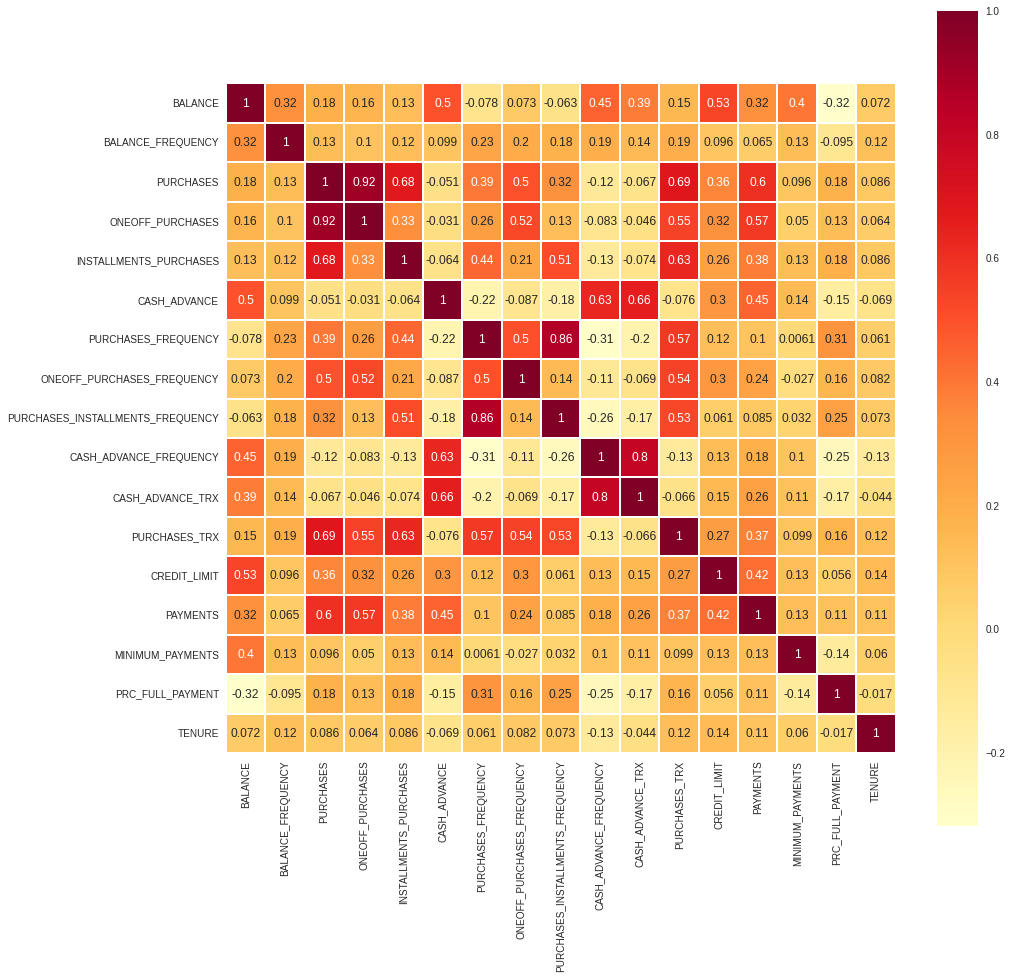

In [ ]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='YlOrRd', square=True);
# show the plot
plt.show()

We see that there are many columns which are correlated to other.

**Visualizing Outlier**

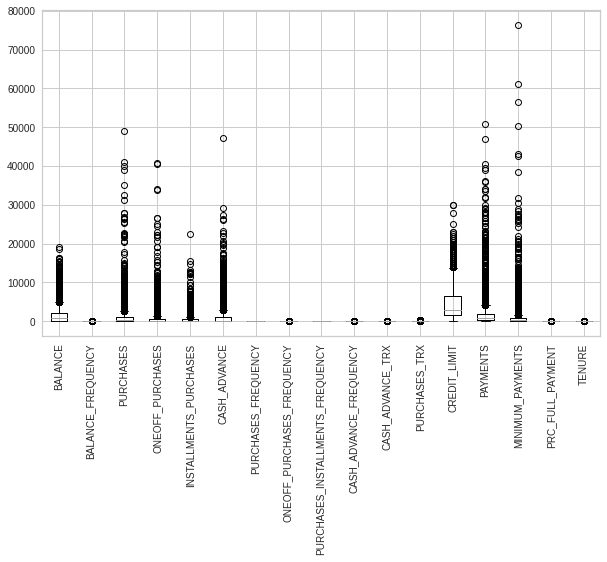

In [ ]:
columns = df.columns.tolist()
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(columns, ax=ax)
columns = df.columns.tolist()
ax.set_xticklabels(columns, rotation=90)
plt.show()

**Analyzing Data**

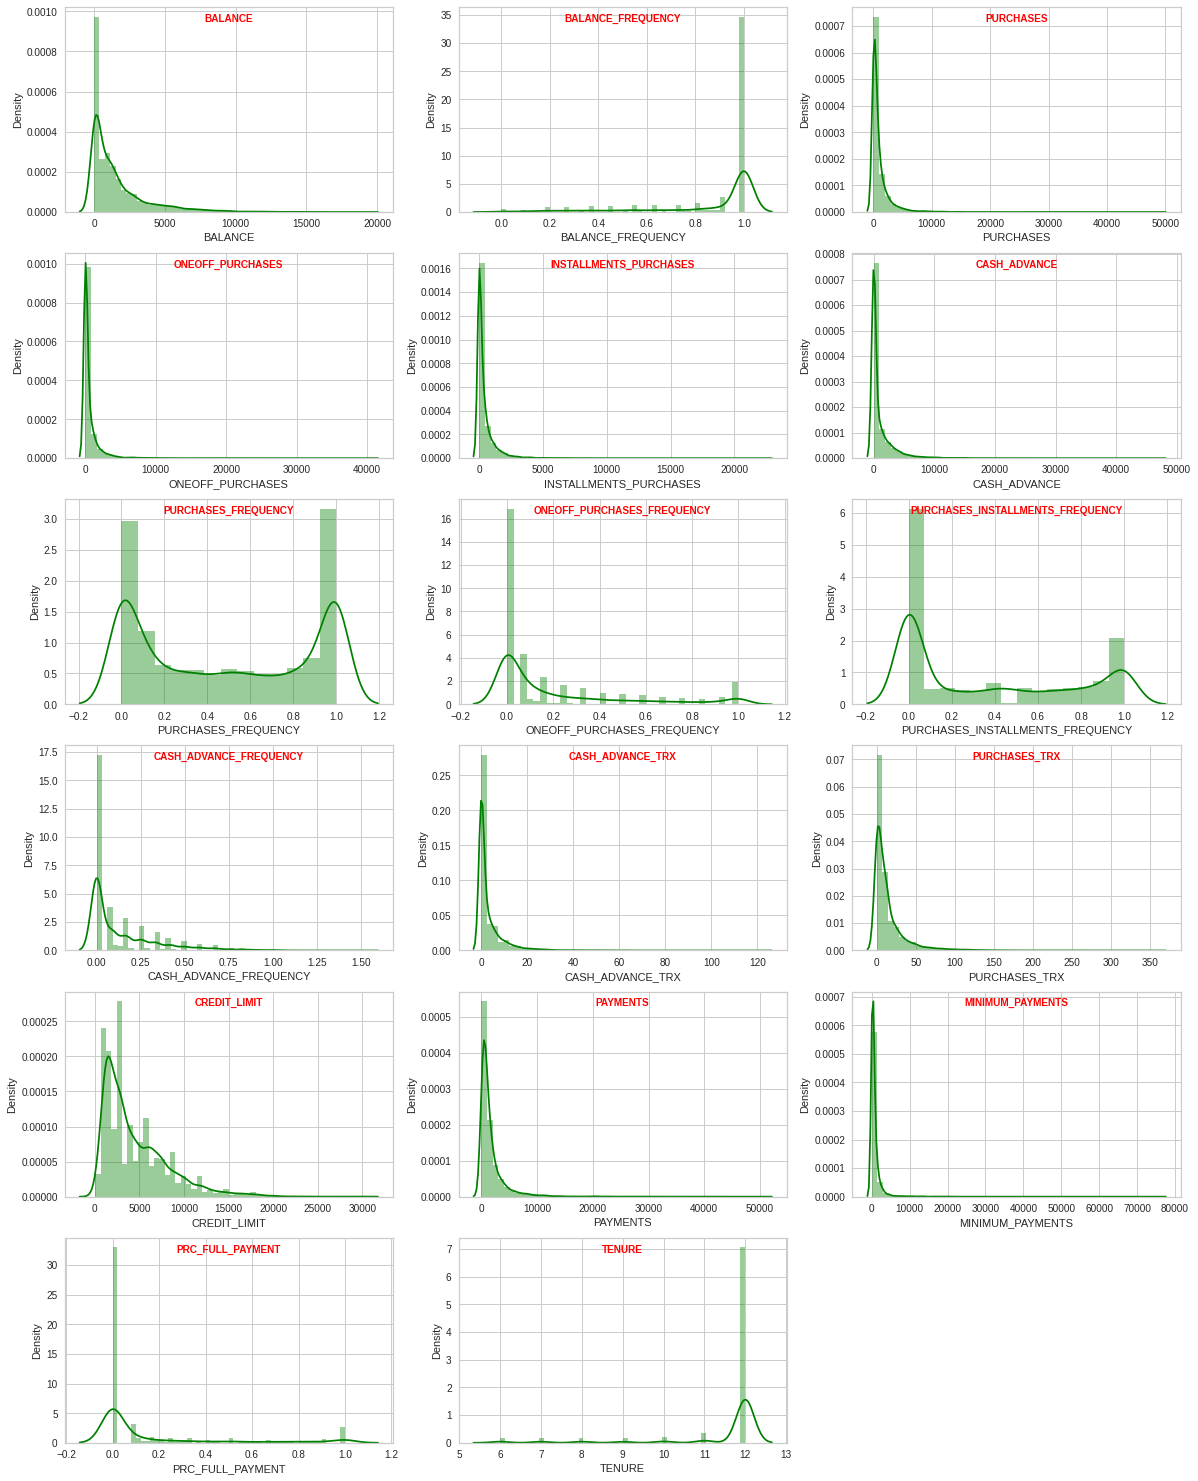

In [ ]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in columns:
    plt.subplot(9, 3, x)
    sns.distplot(df[column],color='green')
    plt.title('{}'.format(column), fontsize=10, color ='red', fontweight = 'bold', y=0.90)
    x += 1

*   BALANCE: Most users have balance lesser than 5000 and nearly all users have balance lesser than 10000.
*   BALANCE_FREUQUENCY: Most users have balance frequency greater than 0.8 and nearly all the users have BALANCE_FREUQUENCY as 1.
*   PURHCASES: Nearly all users have purchases lesser than 5000.
*   ONEOFF_PURCHASES: Nearly all users have one-off purchases lesser than 5000. 
*   INSTALLMENT_PURCHASES: Nearly all users have installment purchases lesser than 2500.
*   etc...


**Applying MinMax Scaler**

In [ ]:
# Columns to apply Normalization
cols_norm = df.columns

# Copy of DataFrame
df_norm = df.copy()

norm = MinMaxScaler()
df_norm[cols_norm] = norm.fit_transform(df[cols_norm])

In [ ]:
# Summary of Normalized Data
df_norm.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,0.082163,0.877350,0.020459,0.014536,0.018272,0.020768,0.490405,0.202480,0.364478,0.090094,0.026415,0.041094,0.148396,0.034174,0.011059,0.153732,0.919656
std,0.109309,0.236798,0.043572,0.040724,0.040195,0.044493,0.401360,0.298345,0.397451,0.133422,0.055488,0.069437,0.121496,0.057080,0.030533,0.292511,0.222856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006741,0.888889,0.000812,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.007557,0.002236,0.000000,1.000000
50%,0.045879,1.000000,0.007371,0.000932,0.003956,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.016897,0.004089,0.000000,1.000000
75%,0.107880,1.000000,0.022638,0.014176,0.020829,0.023630,0.916667,0.300000,0.750000,0.148148,0.032520,0.047486,0.215359,0.037485,0.010322,0.142857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Apply logarithmic transformation to all columns
df_norm_log = df_norm.apply(lambda x: np.log(x + 1))

Applying a logarithmic transformation after a min-max scaler could help to reduce the impact of these extreme values and make the distribution more symmetrical. 

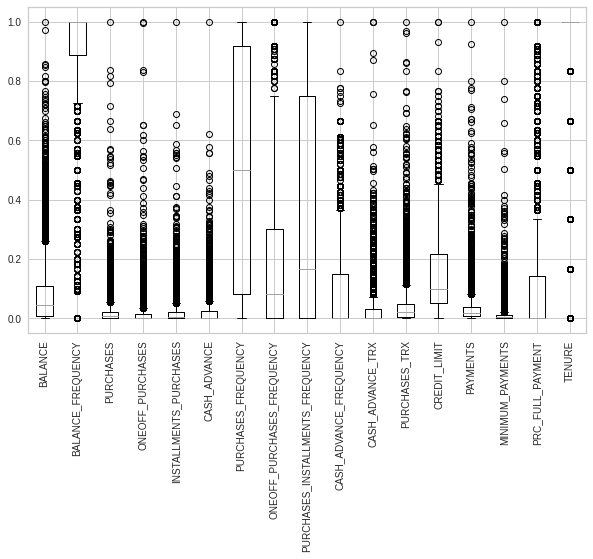

In [ ]:
columns = df.columns.tolist()
fig, ax = plt.subplots(figsize=(10, 6))
df_norm.boxplot(columns, ax=ax)
columns = df.columns.tolist()
ax.set_xticklabels(columns, rotation=90)
plt.show()

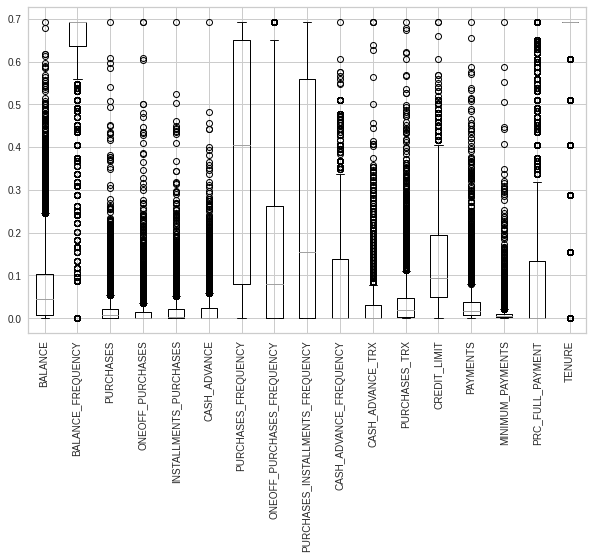

In [ ]:
columns = df.columns.tolist()
fig, ax = plt.subplots(figsize=(10, 6))
df_norm_log.boxplot(columns, ax=ax)
columns = df.columns.tolist()
ax.set_xticklabels(columns, rotation=90)
plt.show()

**Principal Component Analysis - PCA**

In [ ]:
# Instantiate the PCA
pca = PCA()

# Apply the PCA
df_pca = pca.fit_transform(df_norm)

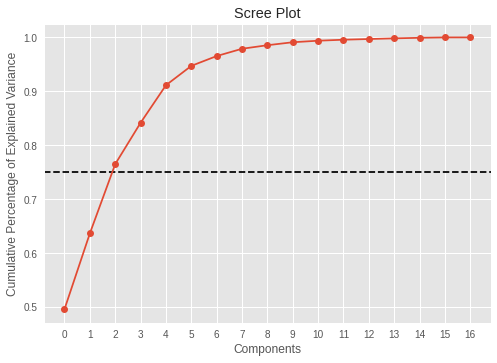

In [ ]:
# Plot
plt.style.use('ggplot')
plt.axhline(y=0.75, color='black', linestyle='--')
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Components') 
plt.ylabel('Cumulative Percentage of Explained Variance') 
plt.title('Scree Plot')
plt.show()

A cumulative percentage of explained variance of 0.75 for 2 principal components means that the first 2 principal components explain 75% of the total variance in the data. In other words, these 2 components capture the majority of the variability in the original data.

In this case, we are choosing the first 2 principal components and they would be able to explain 75% of the total variance in the data. 

**Choosing 2 PC in PCA**

In [ ]:
# Apply PCA to 2 components
pca1 = PCA(n_components=2, random_state=18)
df_pca1 = pca1.fit_transform(df_norm)
df_pca1.shape

(8949, 2)

**Finding the optimal number of clusters in KMEANS Algorithm**

**Using distortion Metric**


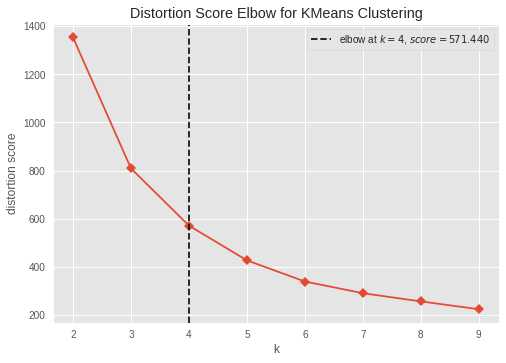

In [ ]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

The scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. 

The optimal K value is 4

**Using silhouette Metric**

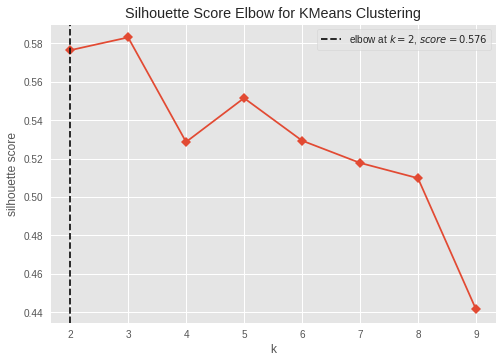

In [ ]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

it tells we should take 2 as number of clusters

**Using calinski_harabasz Metric**

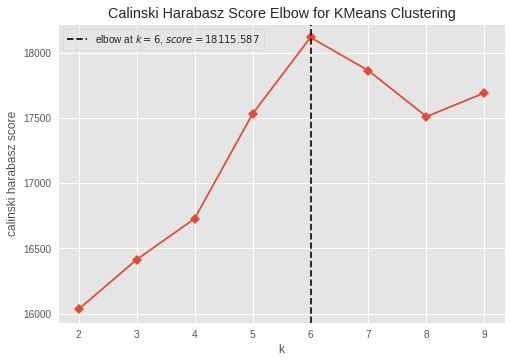

In [ ]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

it tells we should take 6 as number of clusters

For n_clusters=2, the Davies Bouldin score is 0.663
For n_clusters=3, the Davies Bouldin score is 0.750
For n_clusters=4, the Davies Bouldin score is 0.762
For n_clusters=5, the Davies Bouldin score is 0.696
For n_clusters=6, the Davies Bouldin score is 0.724
For n_clusters=7, the Davies Bouldin score is 0.759
For n_clusters=8, the Davies Bouldin score is 0.749
For n_clusters=9, the Davies Bouldin score is 0.758
For n_clusters=10, the Davies Bouldin score is 0.780


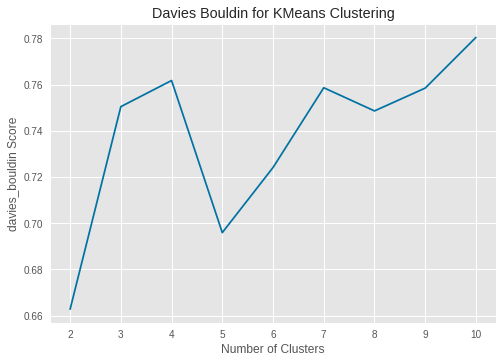

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

davies_bouldin = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca1)
    davies_bouldin_score_avg = davies_bouldin_score(df_pca1, cluster_labels)
    davies_bouldin.append(davies_bouldin_score_avg)
    print(f"For n_clusters={n_clusters}, the Davies Bouldin score is {davies_bouldin_score_avg:.3f}")

# Plot the silhouette scores
plt.plot(range(2, 11), davies_bouldin, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('davies_bouldin Score')
plt.title('Davies Bouldin for KMeans Clustering')
plt.show()

In [ ]:
# Evaluating metrics for several different cluster values

# Metrics

n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state = 18)
    pred = kmeans.fit_predict(df_pca1)

    silhouette.append(silhouette_score(df_pca1, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_pca1, pred))
    davies_bouldin.append(davies_bouldin_score(df_pca1, pred))
    inertia.append(kmeans.inertia_)
    n_clusters.append(n_cluster)
    
# Results
  
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin,
    'Inertia': inertia})

result.sort_values('Silhouette', ascending=False)

,Clusters,Silhouette,Calinski Harabasz,Davies Bouldin,Inertia
1,3,0.583073,16413.991753,0.752277,808.913648
0,2,0.576398,16034.431424,0.662786,1352.814582
3,5,0.551496,17530.205955,0.696064,427.297759
4,6,0.529361,18115.587412,0.724080,339.427746
2,4,0.528659,16727.399439,0.761492,571.444544
5,7,0.517765,17861.070882,0.759148,290.904591
6,8,0.509806,17509.502990,0.753521,256.812559
8,10,0.450175,17689.553374,0.781699,200.816989
7,9,0.441610,17690.889164,0.780982,224.432824


Based on this, we take the n as 3. I aslo seems a reasonable assumption for segmentation

In [ ]:
#Apply the K-Means algorithm to 3 Clusters
kmeans1 = KMeans(n_clusters=3, random_state=18)
kmeans1.fit(df_pca1)
labels1 = kmeans1.labels_

In [ ]:
# Copy of the Original Dataframe
df1 = df.copy()

In [ ]:
# Append clusters result to Dataframe
df1['cluster'] = labels1

In [ ]:
# Quantity of each cluster
df1['cluster'].value_counts()

0    4702
1    2717
2    1530
Name: cluster, dtype: int64

In [ ]:
# Dataframe for two components
df_pca1_kmn = pd.DataFrame(data = df_pca1, columns = ['pca1', 'pca2'])

# Append cluster labels to the Dataframe
df_pca1_kmn = pd.concat([df_pca1_kmn, pd.DataFrame({'cluster':labels1})], axis=1)

In [ ]:
# Table with 2 PCAs
df_pca1_kmn.head()

,pca1,pca2,cluster
0,-0.482269,-0.097884,0
1,-0.608709,-0.019549,0
2,0.304349,0.921073,2
3,-0.588699,-0.005678,0
4,-0.554502,0.052616,0


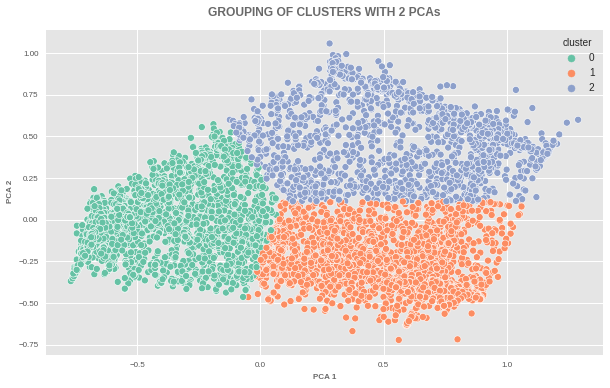

In [ ]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca1_kmn, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS WITH 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [ ]:
# Final K-Means model

# Metrics
metrics = []

kmeans = KMeans(n_clusters= 3, random_state = 18)
pred = kmeans.fit_predict(df_pca1)

model = 'K-Means'
n_clusters = 3
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_kmn = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_kmn

,Model,Number of Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,K-Means,3,0.583073,16413.991753,0.752277


**DBSCAN**

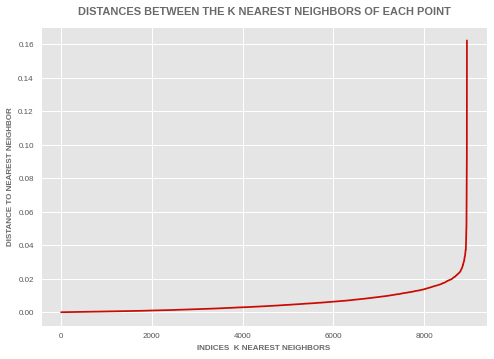

In [ ]:
# NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2).fit(df_pca1)

# Calculating the distances and indices of the k nearest neighbors
distances, indices = nbrs.kneighbors(df_pca1)

# Plot
plt.plot(sorted(distances[:,1]), 'r-')
plt.title('DISTANCES BETWEEN THE K NEAREST NEIGHBORS OF EACH POINT', fontsize = 11, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('INDICES  K NEAREST NEIGHBORS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('DISTANCE TO NEAREST NEIGHBOR', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [ ]:
# Defines the parameter search space
param_grid = {'eps':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10], 'min_samples':[2,5,10, 20, 30, 40, 50, 60, 70]}

# Create the DBSCAN object
dbscan = DBSCAN()

# Creates the GridSearchCV object
grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_score)

# Run the grid search
grid_search.fit(df_pca1)

# Displays the best parameters found
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'eps': 0.01, 'min_samples': 2}


In [ ]:
# Instance of DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=2).fit(df_pca1)

# Getting the cluster labels
labels = dbscan.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 848
Estimated number of noise points: 1704


its not possible to get any meaningful insight with this many clusters

In [ ]:
# Evaluating metrics for several different cluster values

# Metrics

eps =[]
min_samples = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
n_clusters = []
metrics_dbscan = []

for eps in np.linspace(0.01,0.10, num=5):
    for min_sample in range(2, 60, 5):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(df_pca1)
        pred = dbscan.labels_

        silhouette = silhouette_score(df_pca1, pred)
        calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
        davies_bouldin = davies_bouldin_score(df_pca1, pred)
        metrics_dbscan.append((eps, min_sample, silhouette, calinski_harabasz, davies_bouldin, len(set(dbscan.labels_))) )

df_dbscan = pd.DataFrame(metrics_dbscan, columns=['Eps', 'Min Samples', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin', 'Number of Clusters'])
df_dbscan.sort_values('Silhouette', ascending=False).head(10)

,Eps,Min Samples,Silhouette,Calinski Harabasz,Davies Bouldin,Number of Clusters
49,0.1000,7,0.330739,8.062911,1.192228,2
51,0.1000,17,0.308472,10.822298,1.397888,2
48,0.1000,2,0.300042,3.998857,1.488538,2
52,0.1000,22,0.294056,13.787085,1.255619,2
50,0.1000,12,0.291634,7.253920,1.577336,2
38,0.0775,12,0.289621,22.115923,1.405648,2
53,0.1000,27,0.280003,22.697369,1.050597,2
37,0.0775,7,0.268166,12.389474,1.687048,2
25,0.0550,7,0.251569,26.900006,1.862999,2
36,0.0775,2,0.240477,7.166258,1.352516,2


we get eps = 0.1000 and min sample = 7

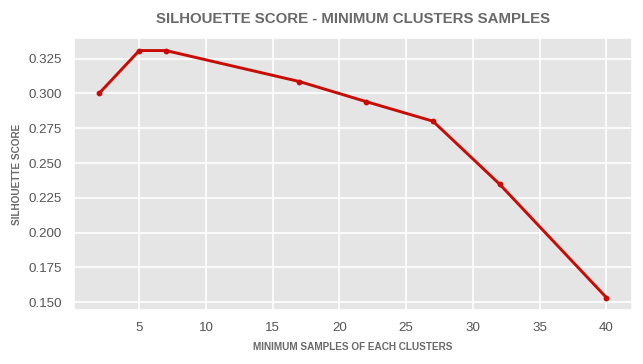

In [ ]:
# Plot 

silhouette_coefs = []

for min_points in [2, 5, 7, 17, 22, 27, 32, 40]:
    db = DBSCAN(eps = 0.1000, min_samples = min_points)
    db.fit(df_pca1)
    silhouette_coefs.append(silhouette_score(df_pca1, db.labels_))
    
plt.figure(figsize = (6, 3), dpi = 120)
plt.plot([2, 5, 7, 17, 22, 27, 32, 40], silhouette_coefs, color = 'r', marker = '.')
plt.title('SILHOUETTE SCORE - MINIMUM CLUSTERS SAMPLES', fontsize = 9, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('MINIMUM SAMPLES OF EACH CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 6)
plt.ylabel('SILHOUETTE SCORE', color = 'dimgrey', fontweight = 'bold', fontsize = 6)
plt.show();

In [ ]:
# DBSCAN instance
dbscan = DBSCAN(eps=0.1000, min_samples=5).fit(df_pca1)

# Getting the cluster labels
dbscan_labels = dbscan.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 3


We cannot work with 1 cluster but we are just visualizing it

In [ ]:
# Copy of the original Dataframe
df_bscan = df.copy()

In [ ]:
# Append DBSCAN clusters result to Dataframe
df_bscan['cluster'] = dbscan_labels

In [ ]:
# Quantity of each cluster
df_bscan['cluster'].value_counts()

 0    8946
-1       3
Name: cluster, dtype: int64

NOTE: The value of -1 represents samples that have not been assigned to any cluster.

In [ ]:
# Copy of Dataframe with 2 PCAs
df_pca1_db = df_pca1.copy()

In [ ]:
# Dataframe for two components
df_pca1_db = pd.DataFrame(data = df_pca1, columns = ['pca1', 'pca2'])

# Append cluster labels to the Dataframe
df_pca1_db = pd.concat([df_pca1_db, pd.DataFrame({'cluster':dbscan_labels})], axis=1)

In [ ]:
# Table with 2 PCAs
df_pca1_db.head()

,pca1,pca2,cluster
0,-0.482269,-0.097884,0
1,-0.608709,-0.019549,0
2,0.304349,0.921073,0
3,-0.588699,-0.005678,0
4,-0.554502,0.052616,0


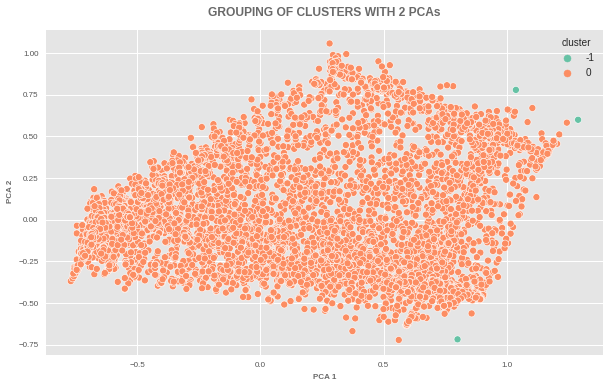

In [ ]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca1_db, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS WITH 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [ ]:
# Final DBSCAN model

# Metrics
metrics = []

dbscan = DBSCAN(eps=0.0550, min_samples=42).fit(df_pca1)
pred = dbscan.labels_

model = 'DBSCAN'
n_clusters = 4
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_db = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_db

,Model,Number of Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,DBSCAN,4,-0.298737,396.982582,1.24425


So meaningful insights can be drawn from DBSCAN

**Hierarchical Clustering**

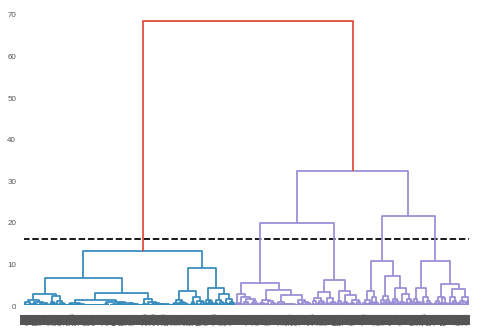

In [ ]:
# Plot

dend = linkage(df_pca1, 'ward')
plt.axhline(y=16, color='black', linestyle='--')
dendrogram(dend)
plt.show();

From the Dendrogram 5 clusters seems to be a reasonable choice. However, let's check out other clustering metrics.

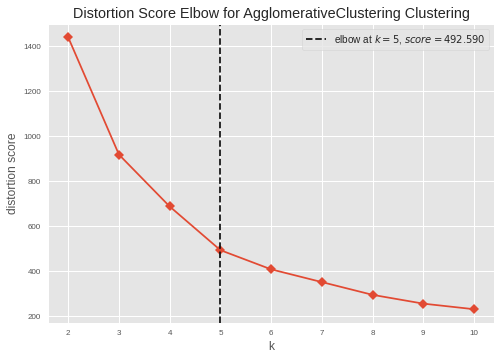

In [ ]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

From distortion score we can say K should be 5

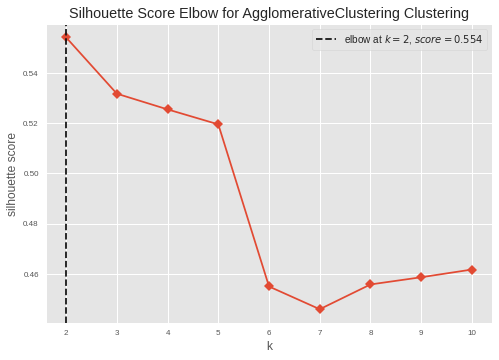

In [ ]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), metric='silhouette', timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

From Silhouette score we can say K should be 2

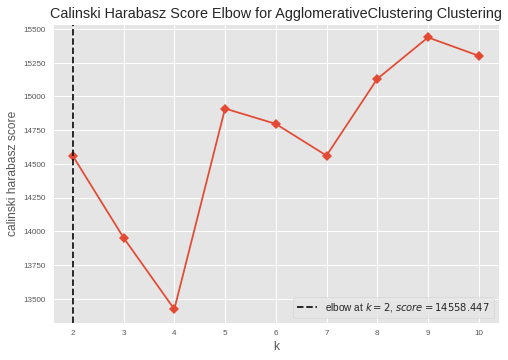

In [ ]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

From calinski_harabasz score we can say K should be 2

In [ ]:
# Evaluating metrics for several different cluster values

# Metrics

n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    ac = AgglomerativeClustering(n_clusters=n_cluster)
    pred = ac.fit_predict(df_pca1)

    silhouette.append(silhouette_score(df_pca1, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_pca1, pred))
    davies_bouldin.append(davies_bouldin_score(df_pca1, pred))
    inertia.append(kmeans.inertia_)
    n_clusters.append(n_cluster)
    
# Results
    
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin})
result.sort_values('Silhouette', ascending=False)

,Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,2,0.554244,14558.447305,0.644946
1,3,0.531804,13952.066695,0.912397
2,4,0.525541,13422.370966,0.817748
3,5,0.519576,14910.067021,0.751008
8,10,0.461688,15301.576040,0.775893
7,9,0.458611,15437.576421,0.782217
6,8,0.455742,15129.954637,0.836134
4,6,0.454923,14796.439618,0.867824
5,7,0.445867,14561.346183,0.818368


So, we take number of clusters as 2

In [ ]:
# Create a hierarchical grouping model
hc = AgglomerativeClustering(n_clusters=2)

# Fit the model to the data
hc.fit(df_pca1)

# Prints the labels for each example
hc_labels = hc.labels_

In [ ]:
# Copy of the original Dataframe
df_hc = df.copy()

In [ ]:
# Append the result of the hierarchical grouping clusters to the Dataframe
df_hc['cluster'] = hc_labels

In [ ]:
# Quantity of each cluster
df_hc['cluster'].value_counts()

0    4693
1    4256
Name: cluster, dtype: int64

In [ ]:
# Copy of Dataframe with 2 PCAs
df_pca1_db = df_pca1.copy()

In [ ]:
# Dataframe for two components
df_pca1_hc = pd.DataFrame(data = df_pca1, columns = ['pca1', 'pca2'])

# Append cluster labels to the Dataframe
df_pca1_hc = pd.concat([df_pca1_hc, pd.DataFrame({'cluster':hc_labels})], axis=1)

In [ ]:
# Table with 2 PCAs
df_pca1_hc.head()

,pca1,pca2,cluster
0,-0.482269,-0.097884,1
1,-0.608709,-0.019549,1
2,0.304349,0.921073,0
3,-0.588699,-0.005678,1
4,-0.554502,0.052616,1


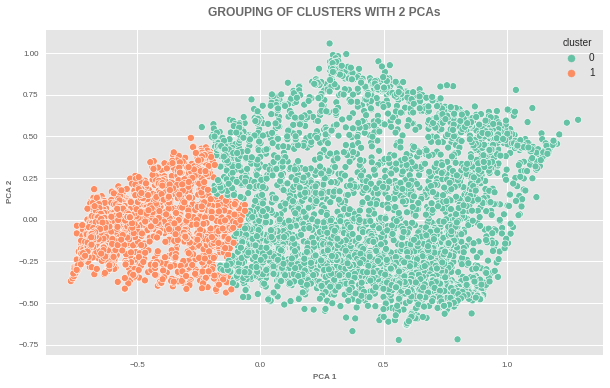

In [ ]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca1_hc, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS WITH 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [ ]:
# Final Hierarchical Clustering Model

# Metrics
metrics = []

hc = AgglomerativeClustering(n_clusters=2)
pred = hc.fit_predict(df_pca1)

model = 'Hierarchical Clustering'
n_clusters = 2
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_hc = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_hc

,Model,Number of Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,Hierarchical Clustering,2,0.554244,14558.447305,0.644946


**Comparsion Matrix**

In [ ]:
# Comparison table between algorithms 
df_comp = pd.concat([df_kmn, df_db, df_hc])
df_comp.sort_values('Silhouette', ascending=False)

,Model,Number of Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,K-Means,3,0.583073,16413.991753,0.752277
0,Hierarchical Clustering,2,0.554244,14558.447305,0.644946
0,DBSCAN,4,-0.298737,396.982582,1.244250


we will use KMeans Clusters as they seem to be the best

In [ ]:
# Append the final result of the clusters to the original Dataframe
df['cluster'] = labels1

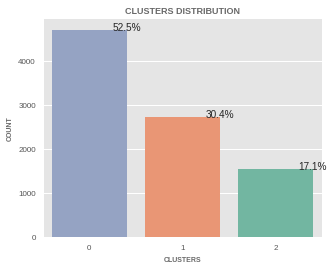

In [ ]:
# Plot

plt.figure(figsize=(5,4))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

total = float(df.shape[0])
ax = sns.countplot(x='cluster', data=df, order = df['cluster'].value_counts().index)
sns.despine()
plt.title('CLUSTERS DISTRIBUTION', fontsize = 9, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 7)
plt.show();

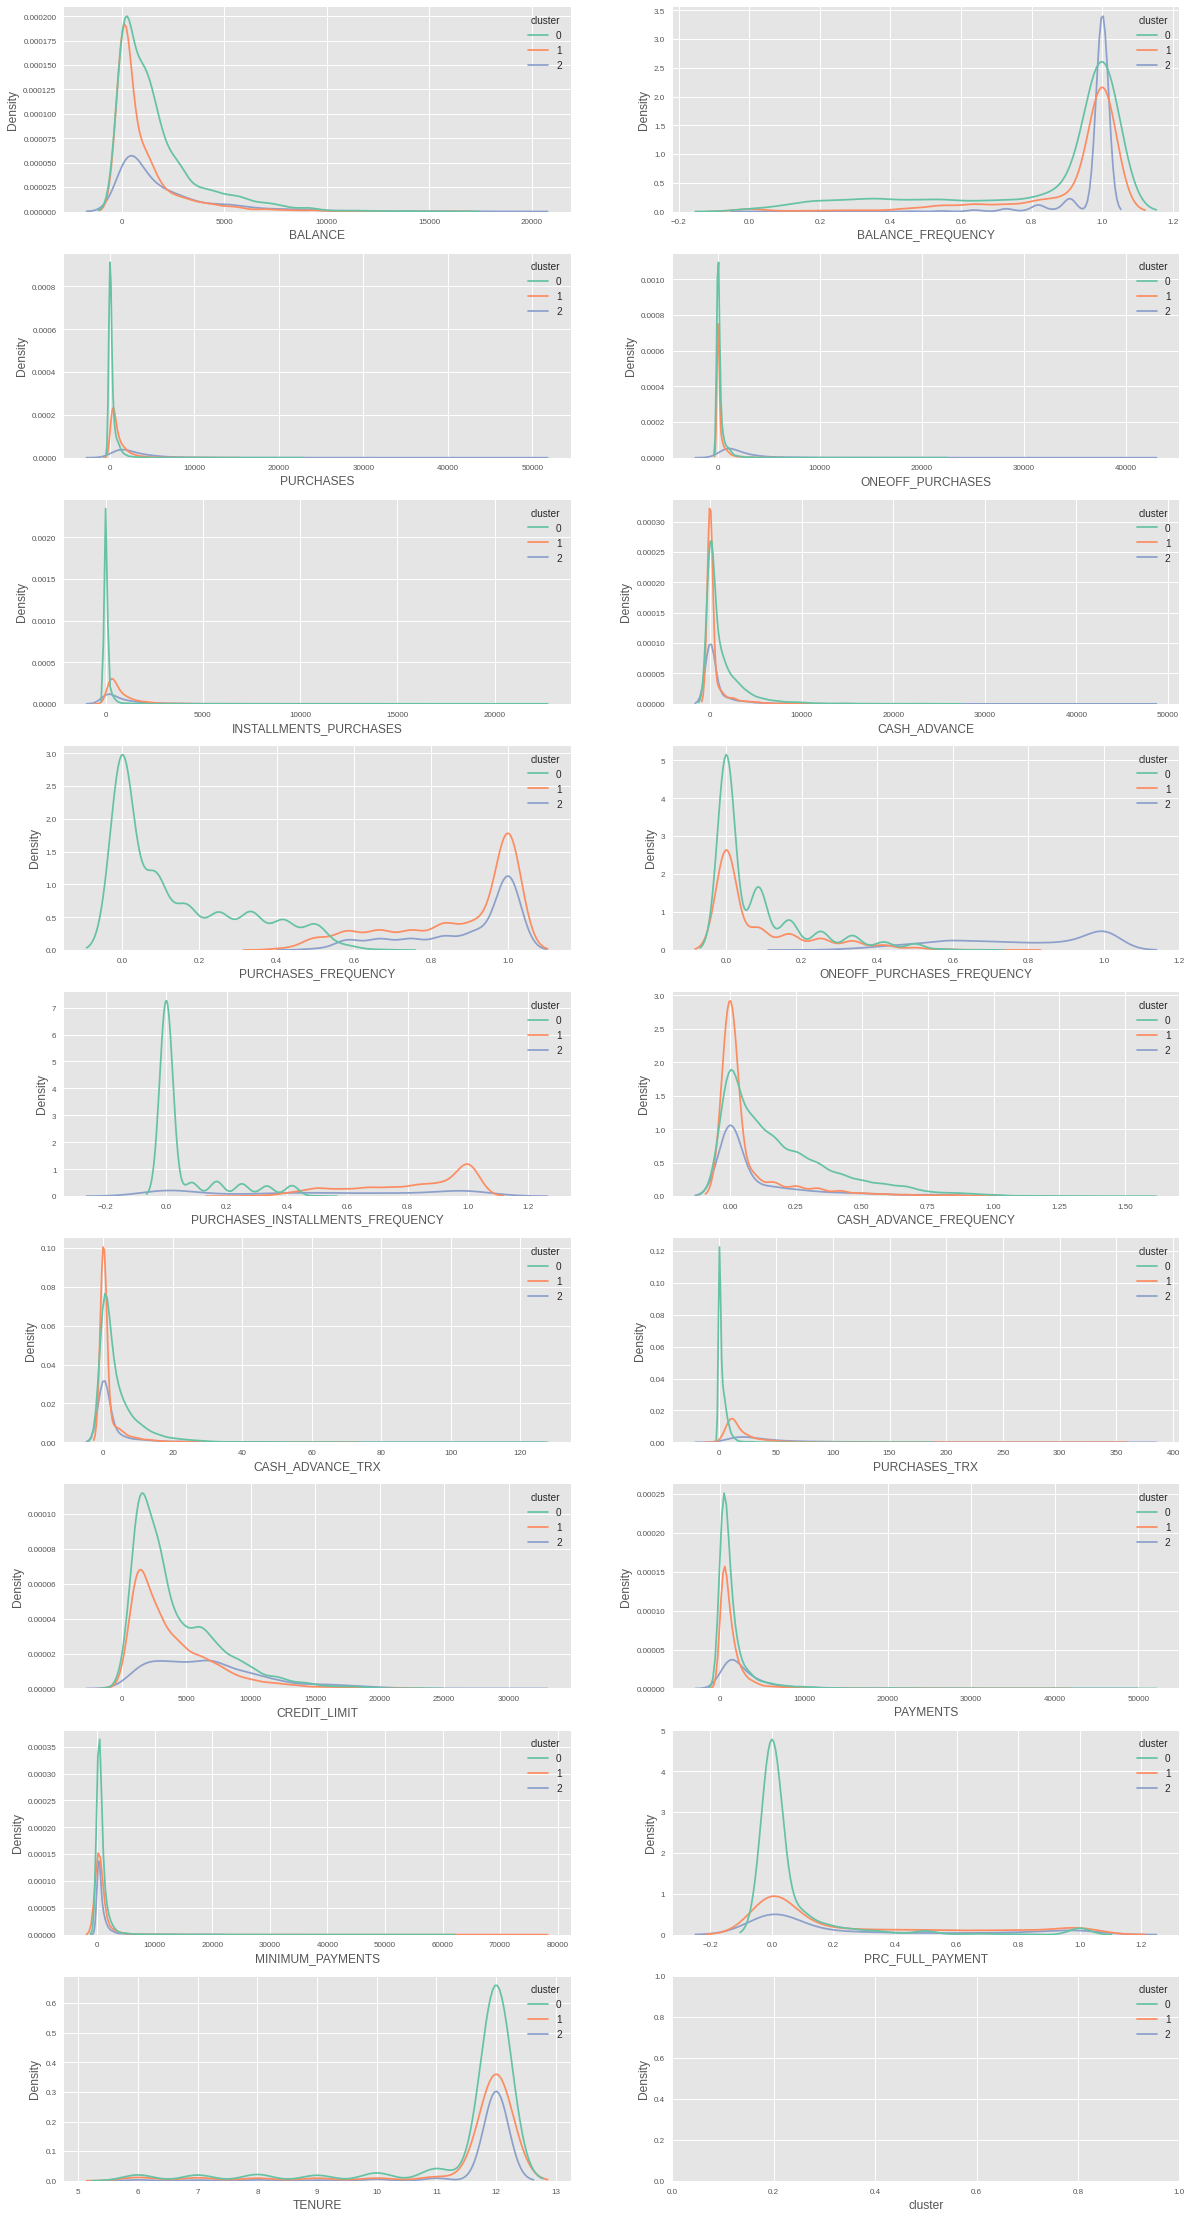

In [ ]:
# Plotting columns by clusters
plt.figure(figsize = (20,40))
x = 1
for d in df:
    plt.subplot(9, 2, x)
    sns.kdeplot(data=df, x=d, hue='cluster', palette='Set2')
    x += 1

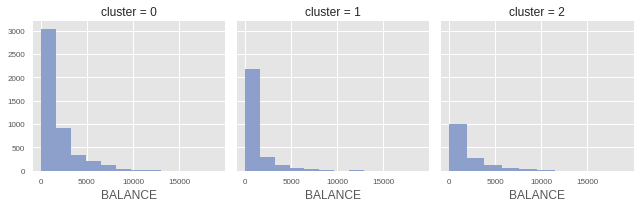

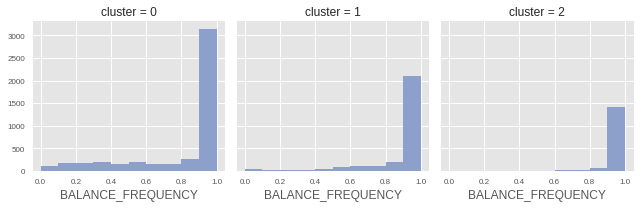

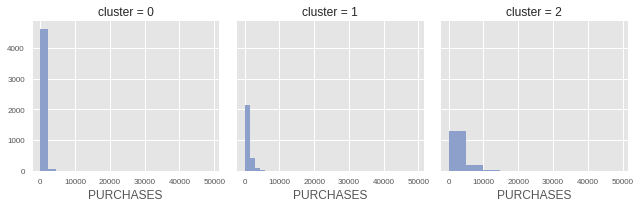

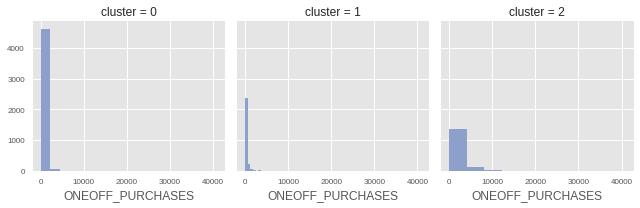

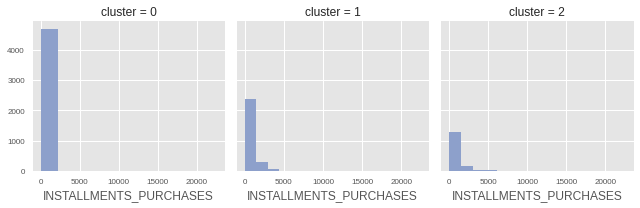

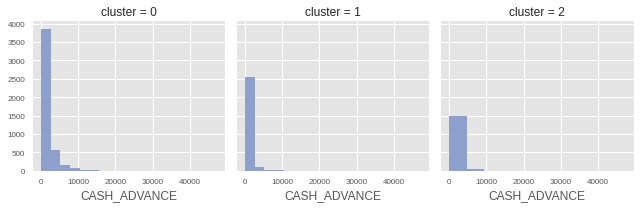

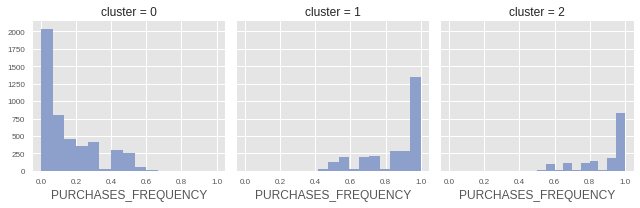

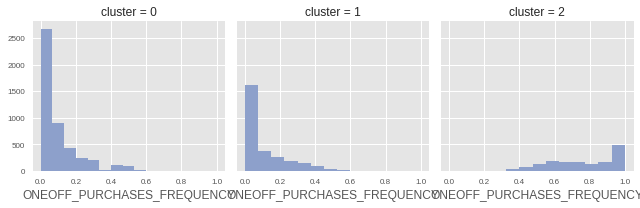

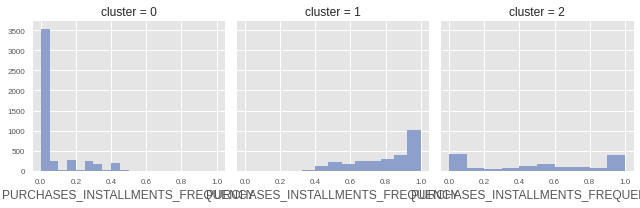

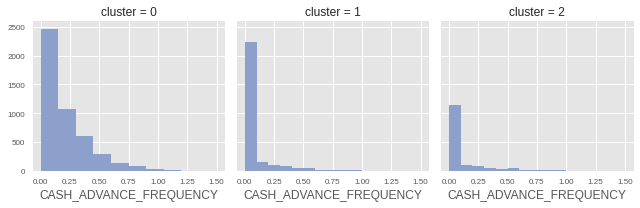

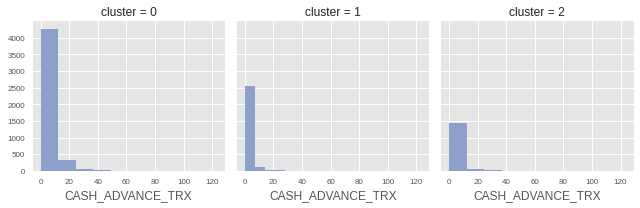

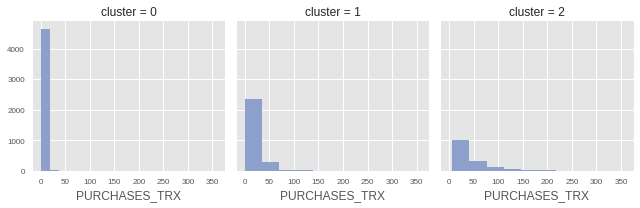

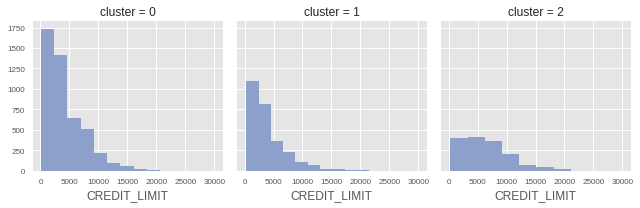

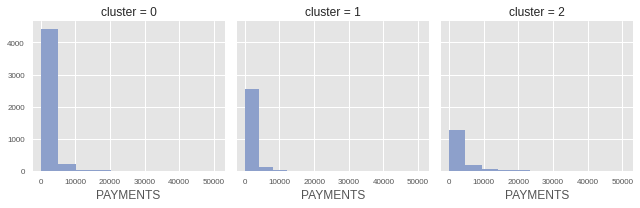

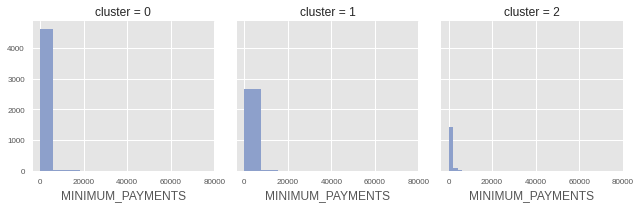

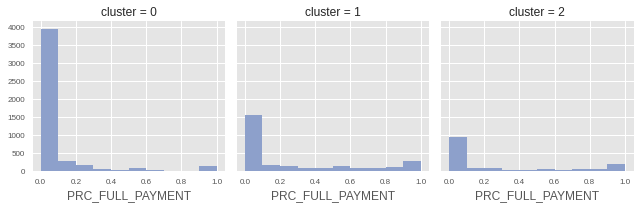

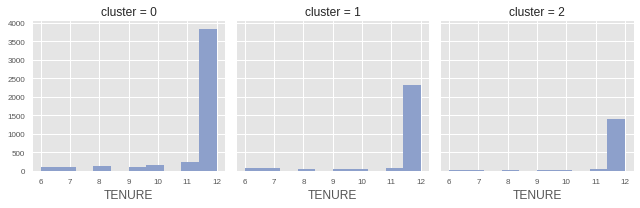

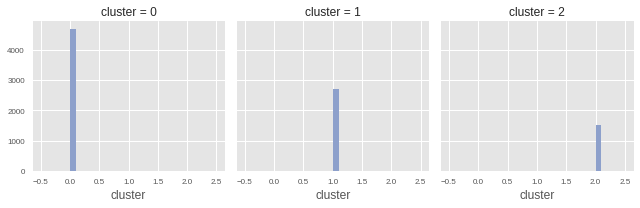

In [ ]:
# Distribution of Clusters by columns
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

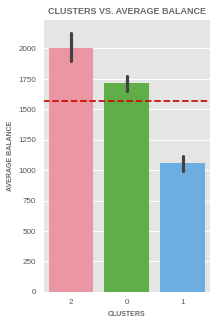

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8


mean = np.mean(df['BALANCE'])
ax = sns.barplot(x = 'cluster', y = 'BALANCE', data=df, order = df.groupby(['cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE BALANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE BALANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Above average balance

Cluster 1: Lowest balance

Cluster 2: Highest balance

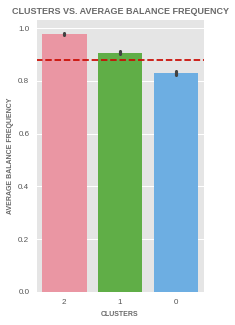

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['BALANCE_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'BALANCE_FREQUENCY', data=df, order = df.groupby(['cluster'])['BALANCE_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE BALANCE FREQUENCY', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE BALANCE FREQUENCY', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();


Cluster 0: Balance updated frequently below average

Cluster 1: Frequently updated balance slightly above average

Cluster 2: Balance updated more frequently

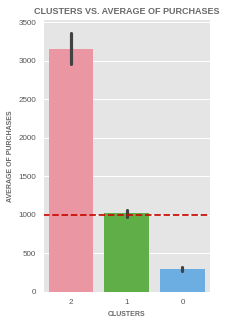

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES', data=df, order = df.groupby(['cluster'])['PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE OF PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE OF PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Very low purchase value

Cluster 1: Average purchase value

Cluster 2: Value of purchases far above others

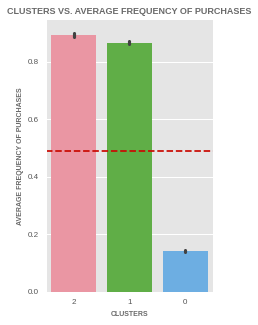

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['PURCHASES_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_FREQUENCY', data=df, order = df.groupby(['cluster'])['PURCHASES_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE FREQUENCY OF PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE FREQUENCY OF PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Low frequency of purchases

Cluster 1: High frequency of purchases

Cluster 2: High frequency of purchases

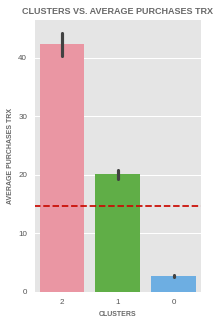

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['PURCHASES_TRX'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_TRX', data=df, order = df.groupby(['cluster'])['PURCHASES_TRX'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE PURCHASES TRX', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE PURCHASES TRX', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Lowest number of purchase transactions made

Cluster 1: Number of purchase transactions made above average

Cluster 2: Highest number of purchase transactions made

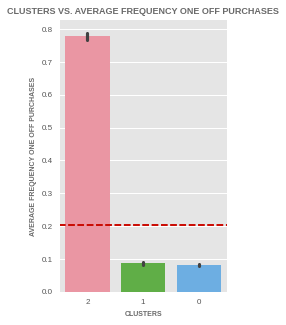

In [ ]:
# Plot

plt.figure(figsize=(3,5))

mean = np.mean(df['ONEOFF_PURCHASES_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'ONEOFF_PURCHASES_FREQUENCY', data=df, order = df.groupby(['cluster'])['ONEOFF_PURCHASES_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE FREQUENCY ONE OFF PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE FREQUENCY ONE OFF PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.8)
plt.show();

Cluster 0: Very low frequency of purchases made at once

Cluster 1: Very low frequency of purchases made at once

Cluster 2: Frequency of purchases made much higher than the others

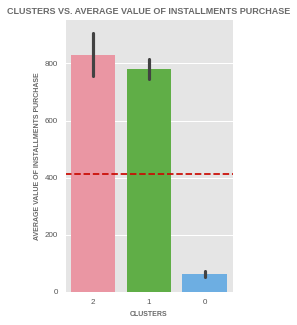

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['INSTALLMENTS_PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'INSTALLMENTS_PURCHASES', data=df, order = df.groupby(['cluster'])['INSTALLMENTS_PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE VALUE OF INSTALLMENTS PURCHASE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE VALUE OF INSTALLMENTS PURCHASE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Low value of installment purchases

Cluster 1: High value of installment purchases

Cluster 2: Higher value of installment purchases

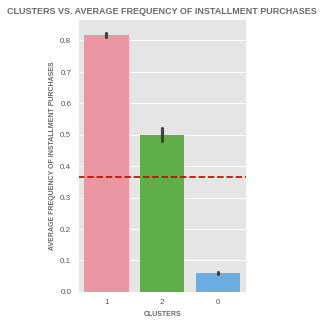

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_INSTALLMENTS_FREQUENCY', data=df, order = df.groupby(['cluster'])['PURCHASES_INSTALLMENTS_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE FREQUENCY OF INSTALLMENT PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE FREQUENCY OF INSTALLMENT PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.7)
plt.show();

Cluster 0: Lower frequency of installment purchases

Cluster 1: Higher frequency of installment purchases

Cluster 2: Frequency of installment purchases above average

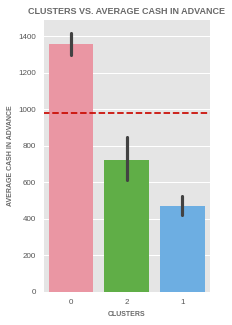

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['CASH_ADVANCE'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE CASH IN ADVANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE CASH IN ADVANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Higher amount of cash upfront

Cluster 1: Below average cash advance amount

Cluster 2: Below average cash advance amount

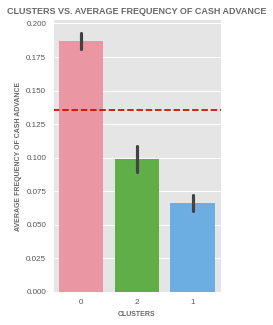

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['CASH_ADVANCE_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE_FREQUENCY', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE FREQUENCY OF CASH ADVANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE FREQUENCY OF CASH ADVANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: High frequency of cash advance

Cluster 1: Frequency of cash advance below average

Cluster 2: Frequency of cash advance below average

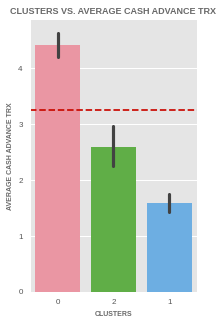

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['CASH_ADVANCE_TRX'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE_TRX', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE_TRX'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE CASH ADVANCE TRX', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE CASH ADVANCE TRX', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Greater number of transactions carried out with cash advance

Cluster 1: Number of transactions carried out with advance cash below average

Cluster 2: Number of transactions carried out with advance cash below average

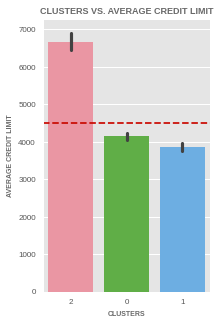

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['CREDIT_LIMIT'])
ax = sns.barplot(x = 'cluster', y = 'CREDIT_LIMIT', data=df, order = df.groupby(['cluster'])['CREDIT_LIMIT'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE CREDIT LIMIT', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE CREDIT LIMIT', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Below average credit card limit

Cluster 1: Below average credit card limit

Cluster 2: Higher credit card limit

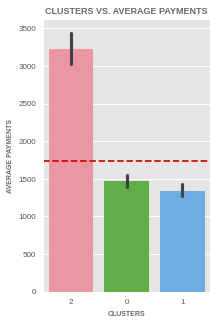

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['PAYMENTS'])
ax = sns.barplot(x = 'cluster', y = 'PAYMENTS', data=df, order = df.groupby(['cluster'])['PAYMENTS'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE PAYMENTS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE PAYMENTS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Payment amount made by user below average

Cluster 1: Payment amount made by user below average

Cluster 2: Highest payment amount made by the user

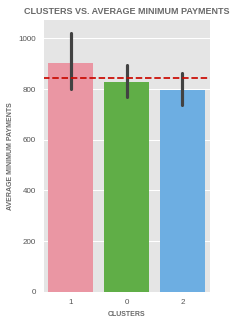

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['MINIMUM_PAYMENTS'])
ax = sns.barplot(x = 'cluster', y = 'MINIMUM_PAYMENTS', data=df, order = df.groupby(['cluster'])['MINIMUM_PAYMENTS'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE MINIMUM PAYMENTS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE MINIMUM PAYMENTS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Minimum amount of payments made by the users slightly below average

Cluster 1: Highest minimum amount of payments made by the users

Cluster 2: Minimum amount of payments made by the users below average

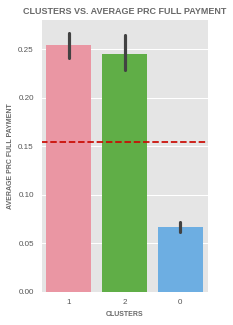

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['PRC_FULL_PAYMENT'])
ax = sns.barplot(x = 'cluster', y = 'PRC_FULL_PAYMENT', data=df, order = df.groupby(['cluster'])['PRC_FULL_PAYMENT'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE PRC FULL PAYMENT', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE PRC FULL PAYMENT', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Cluster 0: Very low percentage of full payment paid by user

Cluster 1: High percentage of full payment paid by user

Cluster 2: High percentage of full payment paid by user

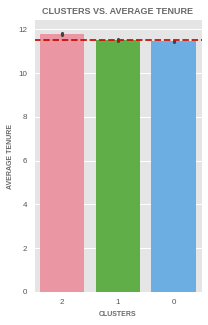

In [ ]:
# Plot

plt.figure(figsize=(3,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

mean = np.mean(df['TENURE'])
ax = sns.barplot(x = 'cluster', y = 'TENURE', data=df, order = df.groupby(['cluster'])['TENURE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE TENURE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE TENURE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show();

Tenure of credit card service to the user almost equal all customers.

In summary, through the interpretation of the graphs, we can infer that:

Cluster 0: What stands out in this group is that despite having an above average balance and the second highest credit limit among the groups, they are the ones whose balance is updated less frequently, as they do not make purchases in general. . However, they are the ones who use the most money in advance compared to the others and still make the full payment far below average.

Cluster 1: The highlight of this group is that they have the lowest credit limit and balance among all, however, they tend to keep their balance updated frequently, as they are the second group that makes the most purchases and these purchases are often paid in installments. They are also the ones with the highest amount of minimum payouts, but they also make above-average full payouts.

Cluster 2: The main characteristic that differentiates this group from the others is that they have a high balance that is frequently updated, have a higher credit card limit, make a much higher number of purchases than the others and with high frequency, both in purchases made in a single time as in purchases in installments and are the ones who make full payments the most.



This grouping helps companies to identify different categories of customers and, based on that, adjust marketing strategies appropriate for each specific cluster of people.

From our study it is found that customers of cluster 2 are the most important customers for the credit card company. So they should try to retain them.